In [ ]:
!conda install numpy matplotlib seaborn -y

мамамылараму
p_bits: [12, 0, 12, 0, 12, 27, 11, 0, 16, 0, 12, 19]
ecb_bits: [2, 1, 2, 1, 2, 26, 5, 1, 30, 1, 2, 18]
p_bits ^ ecb_bits: 14
cbc_bits: [30, 31, 29, 28, 30, 4, 1, 0, 30, 31, 29, 15]
p_bits ^ cbc_bits: 32
cbc_bits: [17, 28, 17, 28, 17, 7, 22, 28, 13, 28, 17, 15]
p_bits ^ ofb_bits: 28
cfb_bits: [17, 29, 28, 28, 17, 6, 27, 7, 10, 6, 7, 20]
p_bits ^ cfb_bits: 27


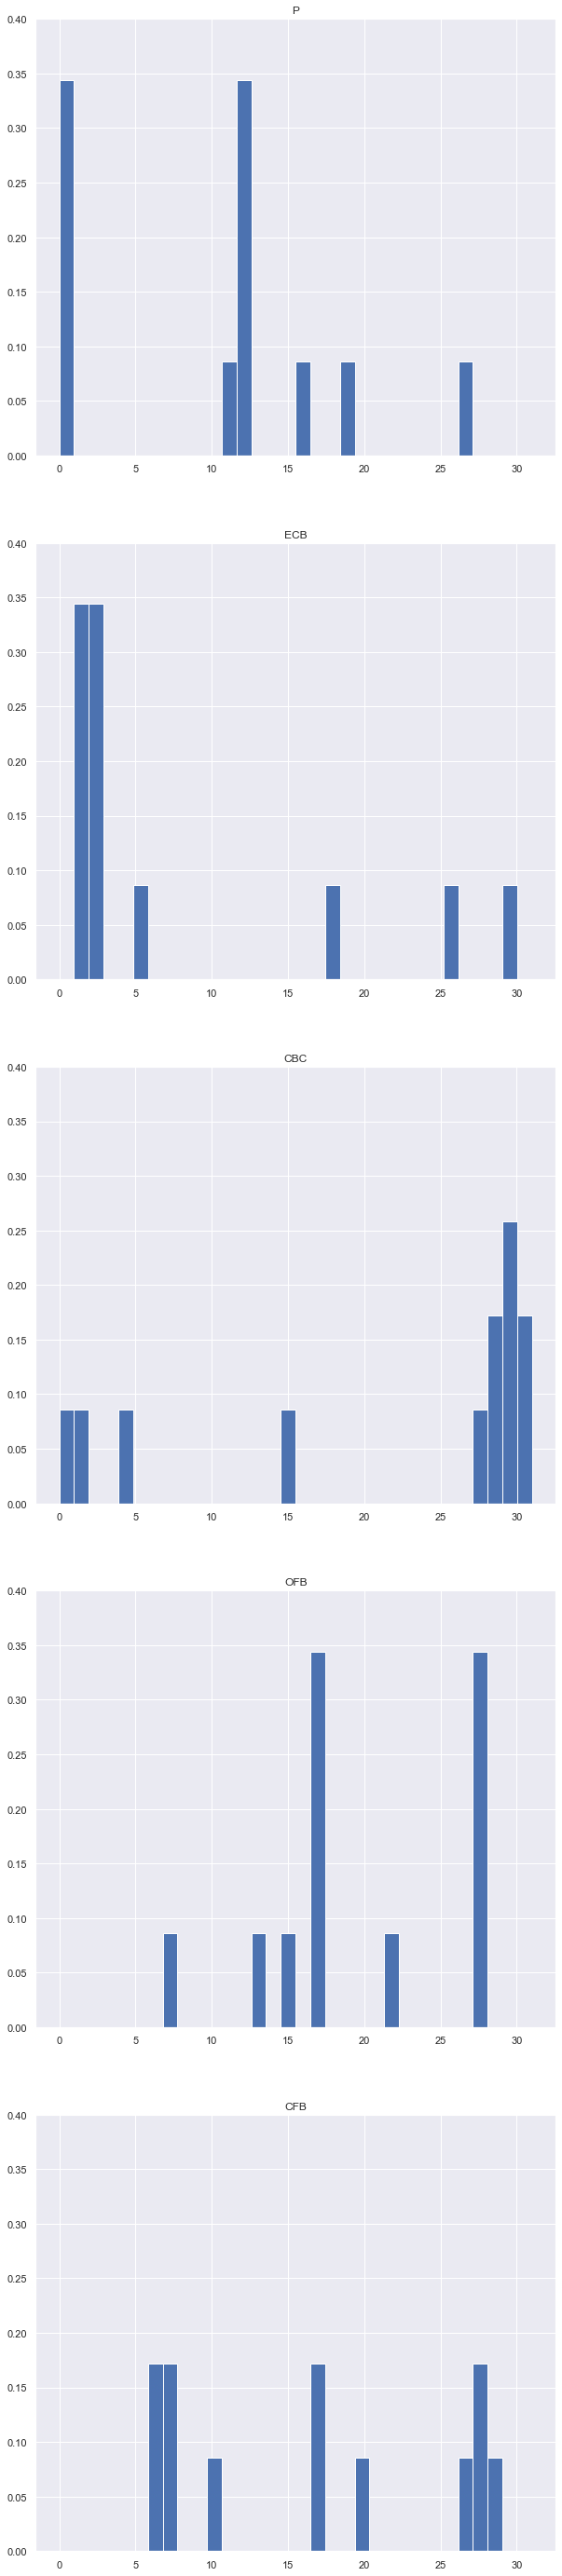

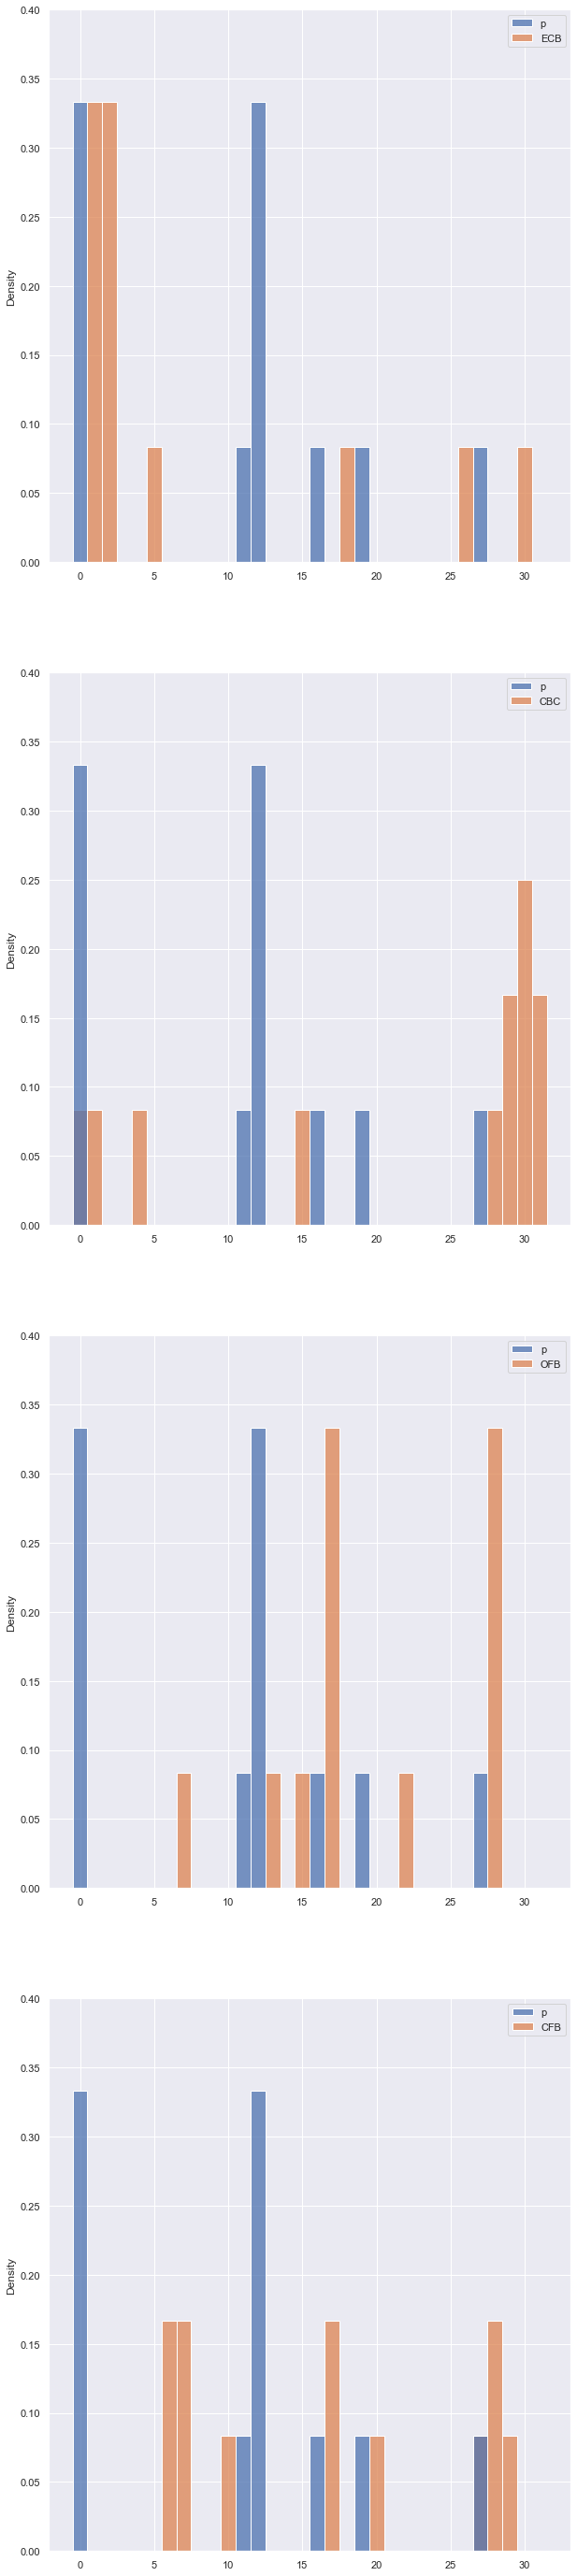

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

def to_bits(input):
    bits_arr = list()
    for s in input:
        bits = ord(s) - ord('а')
        bits_arr.append(bits)
    return bits_arr

def count_diff(a, b):
    diff = 0
    for i in range(len(a)):
        a_bin = bin(a[i])
        b_bin = bin(b[i])
        if len(a_bin) > len(b_bin):
            b_bin += '0' * (len(a_bin) - len(b_bin))
        else:
            a_bin += '0' * (len(b_bin) - len(a_bin))
        for j in range(len(a_bin)):
            if (a_bin[j] != b_bin[j]):
                diff += 1
    return diff

def to_chars(bits):
    s = ""
    for b in bits:
        s += chr(b + ord('а'))
    return s

def ecb(p, k):
    p_bits = to_bits(p)
    k_bits = to_bits(k)
    c = list()
    for i in range(len(p_bits)):
        c.append(p_bits[i] ^ k_bits[i % len(k_bits)] ^ 1)
    return c

def cbc(p, k):
    p_bits = to_bits(p)
    k_bits = to_bits(k)
    c = [28]
    for i in range(len(p_bits)):
        c.append((p_bits[i] ^ c[-1]) ^ k_bits[i % len(k_bits)] ^ 1)
    return c[1:]
    
def ofb(p, k):
    p_bits = [0] + to_bits(p)
    k_bits = to_bits(k)
    c = [28]
    for i in range(1, len(p_bits)):
        c.append(p_bits[i] ^ (p_bits[i - 1] ^ c[i-1] ^ 1))
    return c[1:]

def cfb(p, k):
    p_bits = to_bits(p)
    k_bits = to_bits(k)
    c = [28]
    for i in range(len(p_bits)):
        c.append(p_bits[i] ^ (c[i-1] ^ 1))
    return c[1:]

p = "мамамылараму"
k = "па"

p_bits = to_bits(p)
print(to_chars(p_bits))
ecb_bits = ecb(p, k)
cbc_bits = cbc(p, k)
ofb_bits = ofb(p, k)
cfb_bits = cfb(p, k)
print(f"p_bits: {p_bits}")
print(f"ecb_bits: {ecb_bits}")
print(f"p_bits ^ ecb_bits: {count_diff(p_bits, ecb_bits)}")
print(f"cbc_bits: {cbc_bits}")
print(f"p_bits ^ cbc_bits: {count_diff(p_bits, cbc_bits)}")
print(f"cbc_bits: {ofb_bits}")
print(f"p_bits ^ ofb_bits: {count_diff(p_bits, ofb_bits)}")
print(f"cfb_bits: {cfb_bits}")
print(f"p_bits ^ cfb_bits: {count_diff(p_bits, cfb_bits)}")

fig, ax = plt.subplots(5, 1, figsize=(10, 50))
ax[0].hist(p_bits, range=(0, 31), bins=32, density=True)
ax[0].set_title("P")
ax[0].set_ylim((0, 0.4))
ax[1].hist(ecb_bits, range=(0, 31), bins=32, density=True)
ax[1].set_title("ECB")
ax[1].set_ylim((0, 0.4))
ax[2].hist(cbc_bits, range=(0, 31), bins=32, density=True)
ax[2].set_title("CBC")
ax[2].set_ylim((0, 0.4))
ax[3].hist(ofb_bits, range=(0, 31), bins=32, density=True)
ax[3].set_title("OFB")
ax[3].set_ylim((0, 0.4))
ax[4].hist(cfb_bits, range=(0, 31), bins=32, density=True)
ax[4].set_title("CFB")
ax[4].set_ylim((0, 0.4))
plt.show()
fig, ax = plt.subplots(4, 1, figsize=(10, 50))
ax[0].set_ylim((0, 0.4))
sns.histplot({"p": p_bits, "ECB": ecb_bits}, bins=32, ax=ax[0], stat='density', common_bins=False, common_norm=False, binrange=(0, 31), discrete=True)
ax[1].set_ylim((0, 0.4))
sns.histplot({"p": p_bits, "CBC": cbc_bits}, bins=32, ax=ax[1], stat='density', common_bins=False, common_norm=False, binrange=(0, 31), discrete=True)
ax[2].set_ylim((0, 0.4))
sns.histplot({"p": p_bits, "OFB": ofb_bits}, bins=32, ax=ax[2], stat='density', common_bins=False, common_norm=False, binrange=(0, 31), discrete=True)
ax[3].set_ylim((0, 0.4))
sns.histplot({"p": p_bits, "CFB": cfb_bits}, bins=32, ax=ax[3], stat='density', common_bins=False, common_norm=False, binrange=(0, 31), discrete=True)
plt.show()
#plt.legend(["p", "ECB"])